Epoch 1/10
69/69 [==============================] - 60s 845ms/step - loss: 1.6751 - accuracy: 0.3336 - val_loss: 1.2190 - val_accuracy: 0.5101
Epoch 2/10
69/69 [==============================] - 61s 881ms/step - loss: 1.0202 - accuracy: 0.5539 - val_loss: 0.9177 - val_accuracy: 0.6088
Epoch 3/10
69/69 [==============================] - 59s 853ms/step - loss: 0.8635 - accuracy: 0.6399 - val_loss: 1.0003 - val_accuracy: 0.5832
Epoch 4/10
69/69 [==============================] - 50s 732ms/step - loss: 0.7341 - accuracy: 0.6956 - val_loss: 0.9627 - val_accuracy: 0.6051
Epoch 5/10
69/69 [==============================] - 51s 744ms/step - loss: 0.6628 - accuracy: 0.7358 - val_loss: 0.9880 - val_accuracy: 0.6106
Epoch 6/10
69/69 [==============================] - 56s 816ms/step - loss: 0.5660 - accuracy: 0.7884 - val_loss: 0.8880 - val_accuracy: 0.6453
Epoch 7/10
69/69 [==============================] - 63s 915ms/step - loss: 0.4000 - accuracy: 0.8551 - val_loss: 1.2823 - val_accuracy: 0.6033

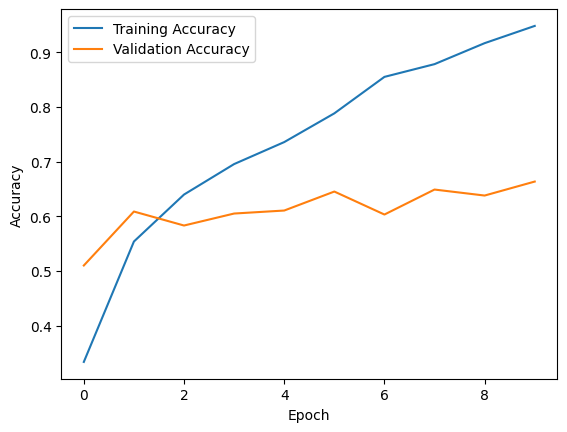

In [2]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

# Function to filter out non-image files
def is_image_file(filename):
    """
    Checking if the file is an image file based on its extension.

    Args:
        filename (str): The name of the file.

    Returns:
        bool: True if the file is an image file, False otherwise.
    """
    return any(filename.endswith(extension) for extension in ['.png', '.jpg', '.jpeg'])

# Function to load and preprocess images
def load_and_preprocess_image(image_path, target_size):
    """
    Load and preprocesses an image.

    Args:
        image_path (str): The path to the image file.
        target_size (tuple): Target size for resizing the image.

    Returns:
        numpy.ndarray: Preprocessed image array.
    """
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    return img_array / 255.0  # Normalizing the image

# Define paths and parameters
user_home = os.path.expanduser("~")
data_folder = "D:\car_dataset"  
data_path = os.path.join(user_home, data_folder)
image_size = (128, 128)
batch_size = 32
epochs = 10

# Data preprocessing
image_list = []
class_labels = []

for class_label in os.listdir(data_path):
    class_path = os.path.join(data_path, class_label)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            if is_image_file(filename):
                image_path = os.path.join(class_path, filename)
                image_list.append(image_path)
                class_labels.append(class_label)

# Split the dataset into training and validation sets
train_images, validation_images, train_labels, validation_labels = train_test_split(
    image_list, class_labels, test_size=0.2, random_state=42, stratify=class_labels
)

# Convert images to numpy arrays
X_train = np.array([load_and_preprocess_image(img, image_size) for img in train_images])
X_validation = np.array([load_and_preprocess_image(img, image_size) for img in validation_images])

y_train = np.array(train_labels)
y_validation = np.array(validation_labels)

# One-hot encode the labels
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_validation = label_binarizer.transform(y_validation)

"""
Brief Report on Network Architecture, Activation Functions, Optimizers, and Loss Functions:

1. Network Architecture:
   - The chosen network architecture comprises a sequential model consisting of convolutional layers followed by max-pooling layers and fully connected layers.
   - Convolutional layers: Three convolutional layers are used with increasing filter sizes (32, 64, and 128) and ReLU activation functions to extract features from input images.
   - Max-pooling layers: Max-pooling layers are added after each convolutional layer to reduce spatial dimensions and capture the most important features.
   - Fully connected layers: Two dense layers with ReLU and softmax activation functions are employed for classification.

2. Activation Functions:
   - ReLU (Rectified Linear Unit): ReLU activation functions are utilized in convolutional and dense layers to introduce non-linearity and enhance the network's ability to learn complex patterns.

3. Optimizer:
   - Adam Optimizer: The Adam optimizer is employed for gradient-based optimization, with a learning rate of 0.001. Adam adapts learning rates for each parameter individually and has shown effectiveness in training deep neural networks.

4. Loss Function:
   - Categorical Crossentropy: Categorical crossentropy loss function is chosen for multi-class classification tasks. It measures the dissimilarity between the true class distributions and the predicted class distributions.

This network architecture, activation functions, optimizer, and loss function were selected based on their effectiveness in training convolutional neural networks for image classification tasks. The chosen configuration aims to strike a balance between model complexity, performance, and computational efficiency.

"""

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_binarizer.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_validation, y_validation))

# Evaluate the model
predictions = model.predict(X_validation)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = label_binarizer.transform(validation_labels)
class_labels = list(label_binarizer.classes_)

# Print classification report and confusion matrix
print("\nClassification Report:\n")
print(classification_report(np.argmax(true_classes, axis=1), predicted_classes, target_names=class_labels))

print("\nConfusion Matrix:\n")
print(confusion_matrix(np.argmax(true_classes, axis=1), predicted_classes))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 


In [3]:
"""
Brief Report on Network Architecture, Activation Functions, Optimizers, and Loss Functions:

1. Network Architecture:
   - The provided code utilizes transfer learning by leveraging pre-trained convolutional neural network (CNN) architectures, namely VGG16 and ResNet50, for feature extraction.
   - VGG16 and ResNet50 are loaded without their top (fully connected) layers, allowing the addition of custom top layers for the specific classification task.
   - The VGG16 and ResNet50 models serve as feature extractors, extracting high-level features from input images.

2. Activation Functions:
   - ReLU (Rectified Linear Unit): ReLU activation function is used in the custom dense layers to introduce non-linearity and enable the network to learn complex patterns in the extracted features.

3. Optimizer:
   - Adam Optimizer: The Adam optimizer is chosen for gradient-based optimization. It adapts learning rates for each parameter individually and has demonstrated effectiveness in training deep neural networks.

4. Loss Function:
   - Categorical Crossentropy: Categorical crossentropy loss function is employed for multi-class classification tasks. It measures the dissimilarity between the true class distributions and the predicted class distributions.

5. Model Compilation and Training:
   - The models are compiled using the Adam optimizer and categorical crossentropy loss function.
   - Training is conducted using the fit() method, specifying the training and validation datasets along with the number of epochs for training iterations.

6. Evaluation:
   - The models are evaluated using the validation dataset to compute loss and accuracy metrics.
   - The validation loss and accuracy are printed to assess the model's performance on unseen data.

The choice of VGG16 and ResNet50 architectures, ReLU activation function, Adam optimizer, and categorical crossentropy loss function is based on their proven effectiveness in image classification tasks and transfer learning scenarios. These configurations aim to facilitate efficient training and accurate classification of images in the provided dataset.
"""

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the VGG16 model without the top (fully connected) layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom top layers
model = Sequential()
model.add(vgg_base)  # Adding the VGG base
model.add(Flatten())  # Flattening the output to feed to dense layers
model.add(Dense(128, activation='relu'))  # Adding a dense layer with ReLU activation
model.add(Dense(len(label_binarizer.classes_), activation='softmax'))  # Adding a dense layer for output classes with softmax activation


In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the ResNet50 model without the top (fully connected) layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the convolutional layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom top layers
model = Sequential()
model.add(resnet_base)  # Adding the ResNet base
model.add(Flatten())  # Flattening the output to feed to dense layers
model.add(Dense(128, activation='relu'))  # Adding a dense layer with ReLU activation
model.add(Dense(len(label_binarizer.classes_), activation='softmax'))  # Adding a dense layer for output classes with softmax activation


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compiling the model with Adam optimizer and categorical crossentropy loss

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_validation, y_validation))  # Training the model using the fit() method with training and validation data

# Evaluate the model
loss, accuracy = model.evaluate(X_validation, y_validation)  # Evaluating the model using the validation dataset

print("Validation Loss:", loss)  # Printing the validation loss
print("Validation Accuracy:", accuracy)  # Printing the validation accuracy


Epoch 1/10
69/69 [==============================] - 142s 2s/step - loss: 2.2374 - accuracy: 0.1380 - val_loss: 2.1971 - val_accuracy: 0.1718
Epoch 2/10
69/69 [==============================] - 137s 2s/step - loss: 2.1485 - accuracy: 0.1801 - val_loss: 2.1257 - val_accuracy: 0.1755
Epoch 3/10
69/69 [==============================] - 122s 2s/step - loss: 2.1087 - accuracy: 0.2331 - val_loss: 2.0893 - val_accuracy: 0.2669
Epoch 4/10
69/69 [==============================] - ETA: 0s - loss: 2.0690 - accuracy: 0.2413


KeyboardInterrupt

